### NLP genre classification

In [1]:
%run SongClassification.py

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12195954344261186320
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4183621632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4147929085967093568
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


This shows that there is one GPU available for processing the data in tensorflow background.
This is a GTX1660Ti and we are going to train all the deep learning models on this library

### Aim of the Project
Since we are going to classifiy the genre we only need to have the lyrics and the genre for each of the lyrics.
So now we are going to preprocess the whole dataset into just lyrics and genre.


In [2]:
df_artist = pd.read_csv ('artists-data.csv')
df_songlist  =  pd.read_csv ('lyrics-data.csv')
df_new = df_artist.rename(columns={'Link': 'ALink'})
## Here we are only going to take the ENGLSIH Songs.
new_df_songlist = df_songlist[df_songlist['Idiom'] == 'ENGLISH']

In [3]:
## Merging both the dataframes based on a common link ALink
df_merge = pd.merge(new_df_songlist,df_new,on = 'ALink')
## Check for null values 
df_merge.isnull().sum()
# Removal of null values
df_merge.dropna(inplace = True) 
df_merge.isnull().sum()
df_merge.head()

,ALink,SName,SLink,Lyric,Idiom,Artist,Songs,Popularity,Genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...


In [4]:
newdf = df_merge.loc[:,['Genre','Lyric']]

In [5]:
newdf

,Genre,Lyric
0,Rock,I could feel at the time. There was no way of ...
1,Pop,I could feel at the time. There was no way of ...
2,Rock,"Take me now, baby, here as I am. Hold me close..."
3,Pop,"Take me now, baby, here as I am. Hold me close..."
4,Rock,These are. These are days you'll remember. Nev...
...,...,...
124225,Rock,Well sometimes I go out by myself. And I look ...
124226,Samba,Feeling my way through the darkness. Guided by...
124227,Rock,Feeling my way through the darkness. Guided by...
124228,Samba,"Don't, don't, that's what you say. Each time t..."


In [109]:
newdf[['Genre','Lyric']]

,Genre,Lyric
0,Rock,I could feel at the time. There was no way of ...
1,Pop,I could feel at the time. There was no way of ...
2,Rock,"Take me now, baby, here as I am. Hold me close..."
3,Pop,"Take me now, baby, here as I am. Hold me close..."
4,Rock,These are. These are days you'll remember. Nev...
...,...,...
124225,Rock,Well sometimes I go out by myself. And I look ...
124226,Samba,Feeling my way through the darkness. Guided by...
124227,Rock,Feeling my way through the darkness. Guided by...
124228,Samba,"Don't, don't, that's what you say. Each time t..."


In [6]:
y_label = newdf['Genre']
x_label = newdf['Lyric']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tqdm

In [8]:
X_t, X_tst, y_t, y_tst = train_test_split(x_label, y_label, test_size=0.20, random_state=100)

In [111]:
from random import shuffle
newdf[['Genre','Lyric']].shuffle(seed=42).select(range(1000))

AttributeError: 'DataFrame' object has no attribute 'shuffle'

In [113]:
X = X_t[:20000]
y = y_t[:20000]

In [114]:
# Use this as the baseline so only X_train1 and y_train1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [115]:
####Import the spacy small library
nlp = spacy.load("en_core_web_sm")

In [116]:
# Function to preprocess the data (Remove stop words,Lemmatize adn check for alphabhets only in given documents)
def preprocess2(text):
    doc = nlp(text)
    return[words.lemma_.lower() for words in doc if words.is_alpha] 
# return[words.lemma_.lower() for words in doc if words.is_alpha and not words.is_stop] 

In [60]:
##Tf-idf Vectoriser
vectorizer = TfidfVectorizer(tokenizer=preprocess2,stop_words='english',use_idf=True, 
                             smooth_idf=True)

In [61]:
%%time
X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)

D:\Anaconda\envs\gpu_access\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'far', 'make', 'nt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 1h 9min 12s


In [15]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [21]:
%%time
cv_results = cross_val_score(logit, X_train_text, y_train, cv=skf, scoring='f1_micro')

Wall time: 17.3 s


In [62]:
cv_results, cv_results.mean()

(array([0.619375, 0.59375 , 0.613125, 0.590625, 0.61375 ]), 0.606125)

## Train LogisticClassifier

In [63]:
%%time
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit.fit(X_train_text, y_train)

Wall time: 36 s


LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

## Train using Naive Bayes Multinomial

In [ ]:
 from sklearn.naive_bayes import MultinomialNB

In [65]:
%%time
nbclf = MultinomialNB()
nbclf.fit(X_train_text, y_train)

Wall time: 369 ms


MultinomialNB()

In [27]:
print(logit.predict(X_test_text))

['Rock' 'Rock' 'Rock' ... 'Pop' 'Pop' 'Rock']


In [28]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(logit.predict(X_test_text),y_test)

array([[   0,    0,    0,    0,    0,    0],
       [   0, 2220,  789,  186,    1,    1],
       [  11, 1062, 3010, 1722,    3,    4],
       [   1,  422, 2650, 7788,    1,    6],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0]], dtype=int64)

In [74]:
from spacy import displacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [67]:
logit.score(X_test_text,y_test)

0.6549278060069427

In [68]:
nbclf.score(X_test_text,y_test)

0.6336972380137847

## KNN Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
 neigh = KNeighborsClassifier(n_neighbors=3)

In [71]:
neigh.fit(X_train_text, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
neigh.score(X_test_text,y_test)

0.40091563113145845

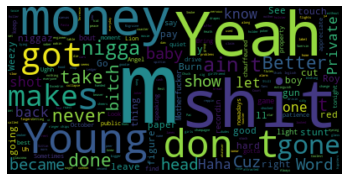

In [75]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(X_train.iloc[2])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
test_preds = logit.predict(X_test_text)
pd.DataFrame(test_preds, columns=['label']).head()

In [ ]:
# logtrained.predict(X_test1)

In [76]:
table = [['Logit', 'NaiveBayes', 'KNN'], [logit.score(X_test_text,y_test), nbclf.score(X_test_text,y_test), neigh.score(X_test_text,y_test)]]
         

In [77]:
print(tabulate(table,tablefmt='fancy_grid', headers='firstrow',showindex =True))

╒════╤══════════╤══════════════╤══════════╕
│    │    Logit │   NaiveBayes │      KNN │
╞════╪══════════╪══════════════╪══════════╡
│  0 │ 0.654928 │     0.633697 │ 0.400916 │
╘════╧══════════╧══════════════╧══════════╛


### Vectorize and try everything witht the small dataset and then try with the large one 

In [ ]:
len(tfidf_tokens)

In [ ]:
df_tfidfvect = pd.DataFrame(data = X.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)

In [ ]:
##Since we cant just pass string variables into a logistic regression we will have to remove and preprocess the whole text


In [ ]:
###Try LSTM and see the differenece

In [ ]:
from transformers import pipeline

In [79]:
from transformers import AutoTokenizer, TFAutoModel
from transformers import AutoModelForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
# bert = TFAutoModel.from_pretrained("bert-base-cased")

In [95]:
# tokenizer = AutoTokenizer.from_pretrained("adrianmoses/autonlp-auto-nlp-lyrics-classification-19333717",  use_auth_token=True)

In [96]:
# model = AutoModelForSequenceClassification.from_pretrained("adrianmoses/autonlp-auto-nlp-lyrics-classification-19333717",  use_auth_token=True)

In [101]:
len(y_train.unique())

6

In [102]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=len(y_train.unique()))

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [99]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = X_train.map(tokenize_function)

TypeError: string indices must be integers

In [112]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")

In [117]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=X_train, eval_dataset=X_test
)

In [118]:
trainer.train()

***** Running training *****
  Num examples = 16000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 6000
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\nandu/.netrc


KeyError: 664